In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas_profiling
import os
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve


In [113]:
# Cargamos los datos
df = pd.read_csv("diabetic_data.csv")

In [114]:
df.tail()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


## Exploración de los Datos

Los datos incluyen el estado de readmisión de 101766 pacientes, en conjunto con otras características.

In [4]:
df.shape

(101766, 50)

In [5]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

- Las distribuciones de readmisión y algunos otros patrones asociados de las pruebas de A1C, suministro de insulina y cambio de medicamentos se muestran.

- Es notable que las distribuciones de los numeros de medicamentos, diagnósticos y procedimientos son muy similares para las categorías para las cuales se agruparon. 

<AxesSubplot:xlabel='num_medications', ylabel='Density'>

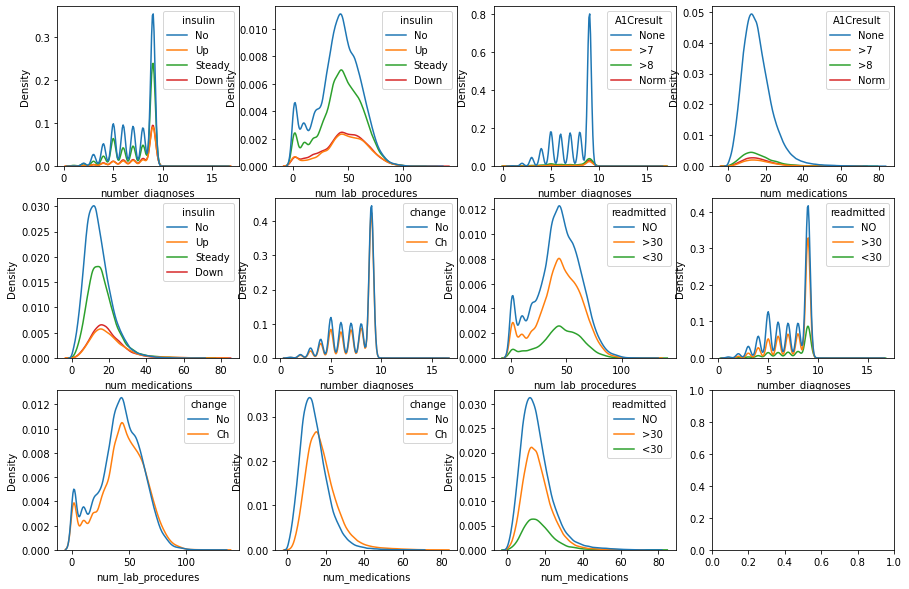

In [7]:
fig, axes = plt.subplots(3,4, figsize=(15, 10))

sns.kdeplot(ax=axes[0,0], data=df, x="number_diagnoses", hue="insulin")
sns.kdeplot(ax=axes[0,1], data=df, x="num_lab_procedures", hue="insulin")
sns.kdeplot(ax=axes[1,0], data=df, x="num_medications", hue="insulin")
sns.kdeplot(ax=axes[1,1], data=df, x="number_diagnoses", hue="change")
sns.kdeplot(ax=axes[2,0], data=df, x="num_lab_procedures", hue="change")
sns.kdeplot(ax=axes[2,1], data=df, x="num_medications", hue="change")
sns.kdeplot(ax=axes[0,2], data=df, x="number_diagnoses", hue="A1Cresult")
sns.kdeplot(ax=axes[0,3], data=df, x="num_medications", hue="A1Cresult")
sns.kdeplot(ax=axes[1,2], data=df, x="num_lab_procedures", hue="readmitted")
sns.kdeplot(ax=axes[1,3], data=df, x="number_diagnoses", hue="readmitted")
sns.kdeplot(ax=axes[2,2], data=df, x="num_medications", hue="readmitted")


 Es claro que para los números de diagnósticos y número de procedimientos de laboratorio (primeras dos gráficas superiores izquierdas) hay diferencias significativas en sus densidades, por lo que puede mostrar que el número medio de medicaciones suministrada varia entre *No*, *Up*, *Steady*, *Down* de las diferentes categorías de insulina.

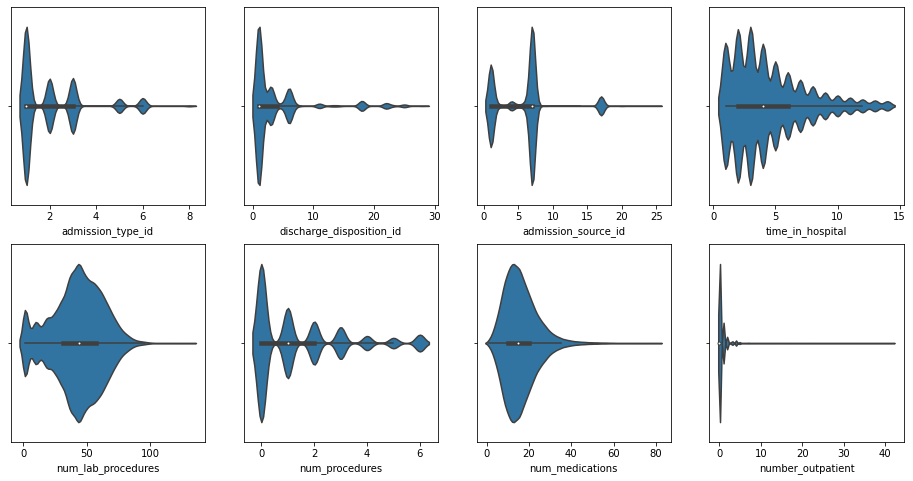

In [115]:
def violin_for_numerical(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.violinplot(x = df[columns[count]],ax=ax[i][j])
            count = count+1
            
numerical = df.select_dtypes(include=np.number).drop(columns=["encounter_id", "patient_nbr"]).columns
violin_for_numerical(df,numerical)

Podemos obervar que existe una concentración en los procedimientos de laboratorio, números de medicamentos, numero de admisión, de disposición y tipo de admisión.

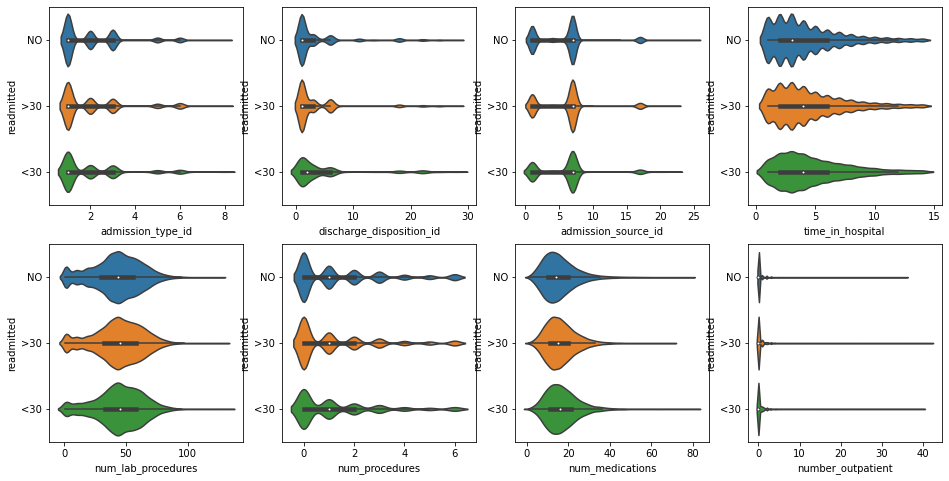

In [119]:
def violin_for_target(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=2,ncols=4, figsize=(16,8))
    for i in range(2):
        for j in range(4):
            sns.violinplot(x = df[columns[count]], y=df["readmitted"],ax=ax[i][j])
            count = count+1
            
numerical = df.select_dtypes(include=np.number).drop(columns=["encounter_id", "patient_nbr"]).columns
violin_for_target(df,numerical)

La mayoría de grupos parecen muy similares en cuanto a sus distribuciones numéricas, esto puede ser algo positivo aunque nos gustaría encontrar diferencias a priori, las tres clases tiene sus variables balanceadas, esto nos servirá más adelante en la modelación.

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


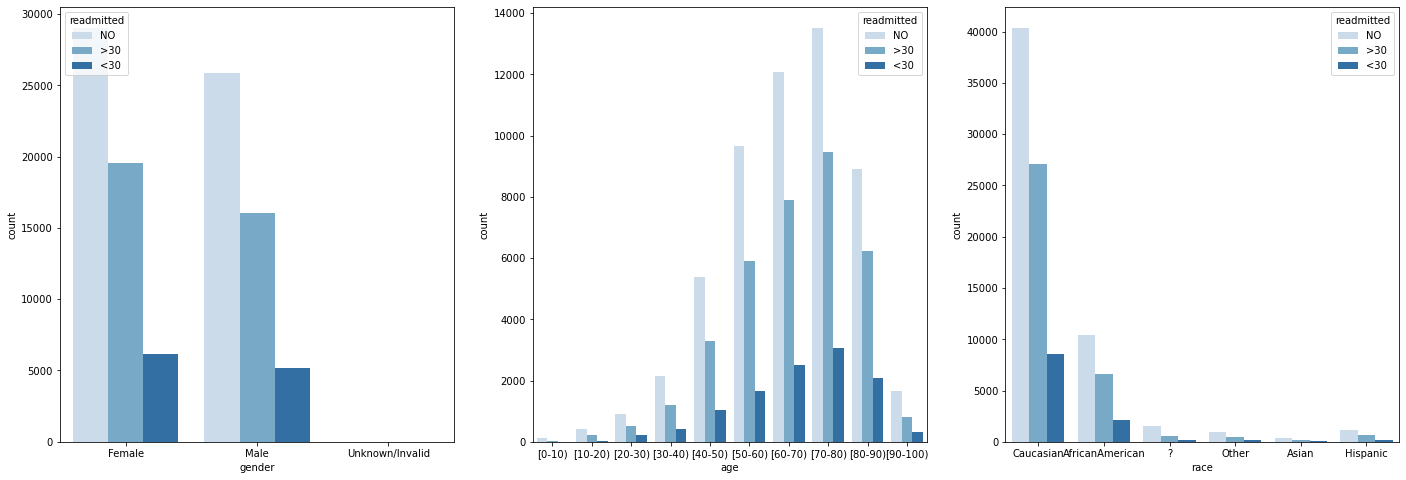

In [128]:
check = ['gender','age','race']
fig, ax =plt.subplots(nrows=1,ncols=3,figsize=(24,8))
count =0
for i in check:
    sns.countplot(df[i], hue=df.readmitted, palette='Blues', ax=ax[count]);
    count = count+1

La mayoría de personas son caucasicos, esto no es de extrañarse debido a la parte del mundo en donde fue tomado el dataset, el mayor número de personas que son readmitidas se encuentrasn entre los 70-80 años, esto puede deberse a complicaciones por la edad, el género parece no tener importancia en la asignación de la variable objetivo.

### Tratamiento de Datos Faltantes

In [129]:
df.replace('?', np.nan , inplace=True)

Hay algunas variables que poseen el valor de signo "?" los reemplazaremos por el tipo de dato *NaN* para trabajar con estos de una forma mucho más sencilla.

In [130]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

La variable *weight* contiene más del 90% de datos faltantes, por lo que no tiene sentido imputar estos datos con alguna técnica, *payer_code* y *medical_specialty* también poseen gran cantidad de datos faltantes más del 40%, también se eliminarán de este análisis.

In [131]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

Eliminaremos el resto de datos que poseen datos faltantes, siendo estos una cantidad considerablemente pequeña, además de eliminar aquellos pacientes de los cuales no se les conozca el genero, siendo desconocido.

In [132]:
df.dropna(inplace=True)
df = df[df["gender"] !=  "Unknown/Invalid"]

In [133]:
df.shape

(98052, 47)

In [134]:
number_unique = df.nunique()
number_unique.where(df.nunique()<=1).dropna()

examide                    1.0
citoglipton                1.0
metformin-rosiglitazone    1.0
dtype: float64

In [135]:
df.drop(["examide", "citoglipton", "metformin-rosiglitazone"], axis=1, inplace=True)

Eliminamos las columnas de la celda de arriba, debido a que poseen solamente 1 valor.

### Remodelación de Características

Realizaremos análisis para definir nuestras características de interes.

<AxesSubplot:xlabel='readmitted', ylabel='count'>

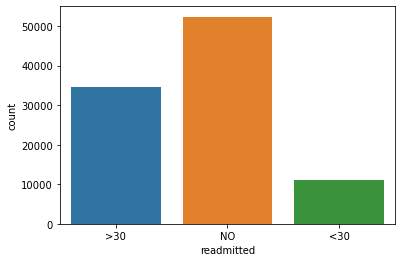

In [136]:
sns.countplot(x="readmitted", data=df)

De la tabla de arriba podemos observar los diferentes tipos de resultados que arroja nuestra variable objetivo.
- "No" Para una persona que no será admitida
- ">30" Para una persona que es readmitida luego de 30 días.
- "<30" Para una persona que es readmitida en menos de 30 días.

Se tomará en cuenta a las personas readmitidas en cualquiera de sus dos formas mayor o menos a 30 días, como fase inicial de este experimento.

In [137]:
# Cargamos el dataset que viene acompañado del principal
df_mapping = pd.read_csv("IDs_mapping.csv")

- Quitamos aquellos datos donde las personas van a morir o están en fase terminal, ya que estos no son de nuestro interés, correspondientes a los ID's en la variable de *discharge_disposition_id* 11, 13, 14, 19, 20, 21.
- Se tomará en cuenta únicamente si la persona será readmitida en el futuro independientemente del tiempo.

In [138]:
death_related = [11,13,14,19,20,21]
df = df[~df["discharge_disposition_id"].isin(death_related)]
df["readmitted"] = (~(df["readmitted"] == "NO")).astype("int")

<AxesSubplot:xlabel='readmitted', ylabel='count'>

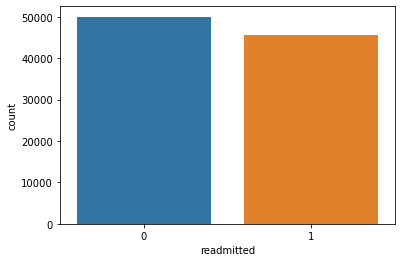

In [139]:
sns.countplot(x="readmitted", data=df)

Al igual que redujimos la dimensionalidad de la variable objetivo, lo mismo haremos con los tipos de id's para tener un control más general sobre estos datos, puesto que varios de ellos se relacionan y pueden estar en una misma categoria.

<img src="admission.png" width="550" alt="Admission Chart">

In [140]:
df["admission_type_id"] = df["admission_type_id"].replace(2, 1)
df["admission_type_id"] = df["admission_type_id"].replace(7, 1)
df["admission_type_id"] = df["admission_type_id"].replace(5, 6)
df["admission_type_id"] = df["admission_type_id"].replace(8, 6)
df["admission_type_id"] = df["admission_type_id"].replace(1, "Urgent")
df["admission_type_id"] = df["admission_type_id"].replace(3, "Elective")
df["admission_type_id"] = df["admission_type_id"].replace(6, "Unknown")
df["admission_type_id"] = df["admission_type_id"].replace(4, "Newborn")

In [141]:
df["admission_type_id"] = df["admission_type_id"].astype(str)

Para discharge se diferenciará por únicamente el criterio de si fue enviado a casa o a otro lugar.

<img src="discharge.png" width="550" alt="Discharge Chart">

In [142]:
discharge_map = df_mapping.iloc[10:40].rename(columns={"admission_type_id":"id"})
discharge_map.reset_index
discharge_map["description"] = discharge_map.where(discharge_map.description.str.contains("home") | discharge_map.description.str.contains("Home"), other="Other")
discharge_map["description"] = discharge_map.description.where(discharge_map.description == "Other", other="Home")

In [143]:
discharge_map = pd.Series(discharge_map.description.values,index=discharge_map.id).to_dict()
df["discharge_disposition_id"] = df["discharge_disposition_id"].replace(discharge_map)

Aquí los separaremos si fue referido para ir al hospital, si fue una urgencia prioritaria u otro.

<img src="source.png" width="550" alt="Source Chart">

In [144]:
df["admission_source_id"] = df["admission_source_id"].replace([1,2,3], "Referral")

df["admission_source_id"] = df["admission_source_id"].replace([4,5,6,8,7,10,11,12,13,14,15,18,19,22,23,24,25,26], "Prior")
df["admission_source_id"] = df["admission_source_id"].replace([9, 17, 20, 21], "Unknown")

### Categorización de Diagnóstico

El dataset contiene tres tipos de diagnóstico, el principal y otros dos que nos dan a inferir las cormobilidades que puede presentar el paciente, cada una de estas tiene unos id's unicos indicados en la fuente anexada de donde se sacaron los datos, se incluiran para hacer que el modelo pueda ser más significativo.

<img src="codes.png" width="550" alt="Source Chart">

In [145]:
diagnostic_list = ["diag_1", "diag_2", "diag_3"]
import re
def transform_val(val):
    """
    Agrupa las variables diagnóstico E-V"
    """
    val = re.sub("V[0-9]*", "1", val) 
    val = re.sub("E[0-9]*", "1", val) 
    val = re.sub('NaN', "-1", val)  
    return val

def transform_cat(val):
    """
    Agrupa las variables diagnóstico.
    """
    if val>=390 and val<=459 or val==785:
        category = 'Circulatory'
    elif val>=460 and val<=519 or val==786:
        category = 'Respiratory'
    elif val>=520 and val<=579 or val==787:
        category = 'Digestive'
    elif val==250:
        category = 'Diabetes'
    elif val>=800 and val<=999:
        category = 'Injury'          
    elif val>=710 and val<=739:
        category = 'Musculoskeletal'   
    elif val>=580 and val<=629 or val==788:
        category = 'Genitourinary'
    elif val>=140 and val<=239 :
        category = 'Neoplasms'
    elif val==-1:
        category = 'NAN'
    else :
        category = 'Other'

    return category

In [146]:
for col in diagnostic_list:
    df[col] = df[col].apply(transform_val)
    df[col] = df[col].astype(float)
    
for col in diagnostic_list:
    df[col] = df[col].apply(transform_cat)

In [147]:
df["age"].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [148]:
ages = list(df["age"].unique())
mapping_age = {}

for i,x in enumerate(range(5, 101, 10)):
    mapping_age[ages[i]] = x
df["age"].replace(mapping_age, inplace=True)

El número de cambio de medicaciones por el paciente puede ser un factor importante a tener en cuenta, porque así podríamos tener una perspectiva de su estado como paciente, crearemos otra variable para esto contando las medicaciones usadas durante su tiempo en el hospital.

In [149]:
medicaments = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [150]:
for val in medicaments:
    valname = str(val) + 'temp'
    df[valname] = df[val].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['change_number'] = 0
for val in medicaments:
    valname = str(val) + 'temp'
    df['change_number'] = df['change_number'] + df[valname]
    del df[valname]
    
df['change_number'].value_counts()

0    69598
1    24701
2     1262
3      106
4        5
Name: change_number, dtype: int64

Agrupados los altos niveles de los resultados de *A1C* y *max_glu_serum*

In [151]:
df['A1Cresult'] = df['A1Cresult'].replace('>7', "High")
df['A1Cresult'] = df['A1Cresult'].replace('>8', "High")
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', "High")
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', "High")

Creamos también el total de medicamentos usados.

In [152]:
for var in medicaments:
    df[var] = df[var].replace('Steady', 1)
    df[var] = df[var].replace('Up', 1)
    df[var] = df[var].replace('Down', 1)

    df[var] = df[var].replace('No', 0)

df['medicaments_total'] = 0

for col in medicaments:
    df['medicaments_total'] = df['medicaments_total'] + df[col]
df['medicaments_total'].value_counts()

1    44184
0    21938
2    20782
3     7417
4     1289
5       57
6        5
Name: medicaments_total, dtype: int64

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


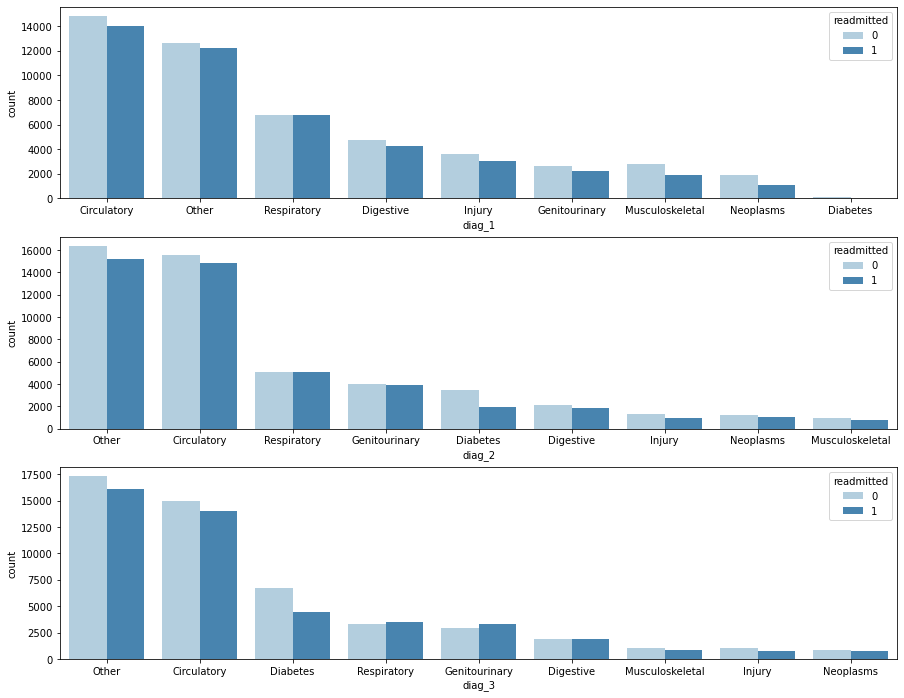

In [154]:
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(15,12))
count =0
for i in diagnostic_list:
    sns.countplot(df[i], hue=df.readmitted, palette='Blues', ax=ax[count], order = df[i].value_counts().index);
    count = count+1

La mayoría de pacientes que están dentro del hospital poseen problemas circulatorios mayoritariamente.

## Model

Utilizaremos algoritmos de árboles de decisión para este primer intento, esto debido a que los árboles de decisión son una buena herramienta para probar modelos primarios ya que no requieren tanta transformaciones de variables, lo que hicimos en la anterior parte fue justificado para tener un modelo más explícito.

In [39]:
variables_model = ['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted']

Escogemos todas las variables que vamos a utilizar.

In [47]:
import time
import joblib
import numpy as np
import pandas as pd
import lightgbm as lgbm
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV

In [48]:
df.drop(["encounter_id", "patient_nbr"], axis=1, inplace=True)

In [55]:
df = pd.get_dummies(df, columns=["race", "gender", "admission_type_id", "admission_source_id", 
                                    "diag_1", "diag_2", "diag_3", "max_glu_serum", "A1Cresult", "change", "diabetesMed"])

In [56]:
X = df.drop("readmitted", axis=1)
y = df["readmitted"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0, stratify=y)
print(X_train.shape)
print(X_test.shape)

(76537, 83)
(19135, 83)


Hacemos los respectivos splits, estratificando la variable de respuesta.

In [107]:
def status_print(optim_result):
    """Estado de la búsqueda bayesiana"""

    # Obtiene todos los modelos testeados en el dataset
    all_models = pd.DataFrame(opt.cv_results_)    

    # Obtiene los parametros actuales y los mejores
    best_params = pd.Series(opt.best_params_)
    print(f"""
        Model {len(all_models)}
        Best roc_auc: { np.round(opt.best_score_, 4)}
        best_params: {opt.best_params_}
    """)

Se hace una hyperparametricación bayesiana, con los respectivos parámetros por defectos específicados abajo.

In [ ]:
params_bayes = {
        'num_leaves': Integer(2, 100),
        'max_depth': Integer(1, 100),
        'min_child_weight': Integer(0, 10),
        'reg_lambda': Real(0.1, 0.9, 'log-uniform'),
        'reg_alpha': Real(0.01, 0.99, 'log-uniform'),
        'n_estimators': Integer(10, 100, 'log-uniform'),
        'feature_fraction': Real(0.01, 0.99, 'log-uniform'),
        'bagging_fraction': Real(0.01, 0.99, 'log-uniform'),
        'bagging_freq': Integer(1, 30, 'log-uniform'),
        'learning_rate': Real(0.0001, 0.99, 'log-uniform'),
        }

n_folds = 3
kf = StratifiedKFold(n_folds, shuffle=True)

model = lgbm.LGBMClassifier(boosting_type= 'dart',               
          objective = "binary", # este focal loss me da scores por fuera de 0 y 1
          n_jobs = -1, 
          silent = True,
          is_unbalance = True,
          metric="auc"
        ) 

opt = BayesSearchCV(model, params_bayes, n_iter=100, cv=kf, 
                    n_jobs=-1, scoring="roc_auc", verbose=0,
                    refit=True,
                    random_state=0)

In [60]:
opt.fit(X_train, y_train, callback=[status_print])



        Model 1
        Best roc_auc: 0.6376
        best_params: OrderedDict([('bagging_fraction', 0.11471250790720901), ('bagging_freq', 21), ('feature_fraction', 0.17486443877623334), ('learning_rate', 0.0383616370629944), ('max_depth', 86), ('min_child_weight', 10), ('n_estimators', 22), ('num_leaves', 2), ('reg_alpha', 0.14774481729196623), ('reg_lambda', 0.17029584298473538)])
    

        Model 2
        Best roc_auc: 0.6534
        best_params: OrderedDict([('bagging_fraction', 0.032780500630524984), ('bagging_freq', 29), ('feature_fraction', 0.6499973568318845), ('learning_rate', 0.0248171522779568), ('max_depth', 27), ('min_child_weight', 2), ('n_estimators', 80), ('num_leaves', 59), ('reg_alpha', 0.01719645076354461), ('reg_lambda', 0.15127954202425636)])
    

        Model 3
        Best roc_auc: 0.6534
        best_params: OrderedDict([('bagging_fraction', 0.032780500630524984), ('bagging_freq', 29), ('feature_fraction', 0.6499973568318845), ('learning_rate', 0.02481715


        Model 23
        Best roc_auc: 0.6722
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 30), ('feature_fraction', 0.6563142477411803), ('learning_rate', 0.22055162834775366), ('max_depth', 71), ('min_child_weight', 6), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha', 0.500979821528915), ('reg_lambda', 0.1767875169270188)])
    

        Model 24
        Best roc_auc: 0.6722
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 30), ('feature_fraction', 0.6563142477411803), ('learning_rate', 0.22055162834775366), ('max_depth', 71), ('min_child_weight', 6), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha', 0.500979821528915), ('reg_lambda', 0.1767875169270188)])
    

        Model 25
        Best roc_auc: 0.6722
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 30), ('feature_fraction', 0.6563142477411803), ('learning_rate', 0.22055162834775366), ('max_depth', 71), ('min_child_we


        Model 46
        Best roc_auc: 0.6751
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 29), ('feature_fraction', 0.99), ('learning_rate', 0.12634558068077462), ('max_depth', 92), ('min_child_weight', 1), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha', 0.99), ('reg_lambda', 0.44031172397160984)])
    

        Model 47
        Best roc_auc: 0.6751
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 29), ('feature_fraction', 0.99), ('learning_rate', 0.12634558068077462), ('max_depth', 92), ('min_child_weight', 1), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha', 0.99), ('reg_lambda', 0.44031172397160984)])
    

        Model 48
        Best roc_auc: 0.6751
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 29), ('feature_fraction', 0.99), ('learning_rate', 0.12634558068077462), ('max_depth', 92), ('min_child_weight', 1), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha


        Model 70
        Best roc_auc: 0.6751
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 29), ('feature_fraction', 0.99), ('learning_rate', 0.12634558068077462), ('max_depth', 92), ('min_child_weight', 1), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha', 0.99), ('reg_lambda', 0.44031172397160984)])
    

        Model 71
        Best roc_auc: 0.6751
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 29), ('feature_fraction', 0.99), ('learning_rate', 0.12634558068077462), ('max_depth', 92), ('min_child_weight', 1), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha', 0.99), ('reg_lambda', 0.44031172397160984)])
    

        Model 72
        Best roc_auc: 0.6751
        best_params: OrderedDict([('bagging_fraction', 0.99), ('bagging_freq', 29), ('feature_fraction', 0.99), ('learning_rate', 0.12634558068077462), ('max_depth', 92), ('min_child_weight', 1), ('n_estimators', 100), ('num_leaves', 100), ('reg_alpha


        Model 94
        Best roc_auc: 0.6762
        best_params: OrderedDict([('bagging_fraction', 0.39887182162540286), ('bagging_freq', 1), ('feature_fraction', 0.4786166537676764), ('learning_rate', 0.04531383231812081), ('max_depth', 87), ('min_child_weight', 8), ('n_estimators', 80), ('num_leaves', 100), ('reg_alpha', 0.2095375738030864), ('reg_lambda', 0.6077911415984482)])
    

        Model 95
        Best roc_auc: 0.6762
        best_params: OrderedDict([('bagging_fraction', 0.39887182162540286), ('bagging_freq', 1), ('feature_fraction', 0.4786166537676764), ('learning_rate', 0.04531383231812081), ('max_depth', 87), ('min_child_weight', 8), ('n_estimators', 80), ('num_leaves', 100), ('reg_alpha', 0.2095375738030864), ('reg_lambda', 0.6077911415984482)])
    

        Model 96
        Best roc_auc: 0.6762
        best_params: OrderedDict([('bagging_fraction', 0.39887182162540286), ('bagging_freq', 1), ('feature_fraction', 0.4786166537676764), ('learning_rate', 0.04531383231

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
              estimator=LGBMClassifier(boosting_type='dart', is_unbalance=True,
                                       metric='auc', objective='binary'),
              n_iter=100, n_jobs=-1, random_state=0, scoring='roc_auc',
              search_spaces={'bagging_fraction': Real(low=0.01, high=0.99, prior='log-uniform', transform='identity'),
                             'bagging_freq': Integer(...
                             'min_child_weight': Integer(low=0, high=10, prior='uniform', transform='identity'),
                             'n_estimators': Integer(low=10, high=100, prior='log-uniform', transform='identity'),
                             'num_leaves': Integer(low=2, high=100, prior='uniform', transform='identity'),
                             'reg_alpha': Real(low=0.01, high=0.99, prior='log-uniform', transform='identity'),
                             'reg_lambda': Real(low=0.1, high=0.9, prio

In [61]:
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test)
y_scores = best_model.predict_proba(X_test)[:,1]

Los mejores parámetros para el modelo se encontraron en la iteración 93, además para este problema se propone como interés la probabilidad de que una persona sea readmitida o no a un hospital, por lo cual la métrica ROC-AUC es pertinente en este caso, mostrando 0.64 de probabilidad de que la clase pueda distinguirse entre la positiva y negativa.

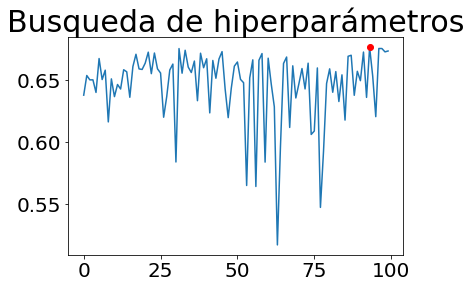

maximo encontrado en la iteracion: 93
media de iteraciones: 0.6458430052174279


In [62]:
index_max = np.argmax(opt.cv_results_["mean_test_score"])
maximo = np.max(opt.cv_results_["mean_test_score"])
ax = plt.subplot(1, 1, 1)
ax.plot(opt.cv_results_["mean_test_score"])
ax.plot(index_max, maximo, "or")
ax.tick_params(axis='both', which='major', labelsize=20)
plt.title("Busqueda de hiperparámetros", fontsize = 30)
ttl = ax.title
ttl.set_position([.5, 1.05])
plt.show()
print(f'maximo encontrado en la iteracion: {index_max}')
print(f'media de iteraciones: {np.mean(opt.cv_results_["mean_test_score"])}')

In [63]:
roc_auc_score(y_test, y_scores)

0.6816903577050215

Ahora se realizará una calibración de probabilidad, esta clase de abajo utiliza la validación cruzada tanto para estimar los parámetros de un clasificador para posteriormente calibrarlo.

In [108]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


In [65]:
sigmoid = CalibratedClassifierCV(best_model, cv=2, method='sigmoid')


In [66]:
sigmoid.fit(X_train, y_train)


[LightGBM] [Warning] feature_fraction is set=0.4786166537676764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4786166537676764
[LightGBM] [Warning] bagging_fraction is set=0.39887182162540286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.39887182162540286
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4786166537676764, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4786166537676764
[LightGBM] [Warning] bagging_fraction is set=0.39887182162540286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.39887182162540286
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


CalibratedClassifierCV(base_estimator=LGBMClassifier(bagging_fraction=0.39887182162540286,
                                                     bagging_freq=1,
                                                     boosting_type='dart',
                                                     feature_fraction=0.4786166537676764,
                                                     is_unbalance=True,
                                                     learning_rate=0.04531383231812081,
                                                     max_depth=87, metric='auc',
                                                     min_child_weight=8,
                                                     n_estimators=80,
                                                     num_leaves=100,
                                                     objective='binary',
                                                     reg_alpha=0.2095375738030864,
                                                     reg_lambda=0.

In [67]:
y_pred_cal = sigmoid.predict(X_test)
y_scores_cal = sigmoid.predict_proba(X_test)[:,1]

In [69]:
print(f"""
AUC en modelo descalibrado: {roc_auc_score(y_test, y_scores)}
AUC en modelo calibrado: {roc_auc_score(y_test, y_scores_cal)}

""")


AUC en modelo descalibrado: 0.6816903577050215
AUC en modelo calibrado: 0.6807364715170766




Notemos que no existe mucha diferencia.

In [70]:
cc = calibration_curve(y_test, y_scores, n_bins=10)

### Diferencia entre curva descalibrada y calibrada


Aqui calculamos las probabilidades verdaderas y predichas para una curva de calibración.

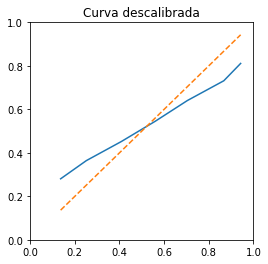

In [71]:
plt.figure(figsize=(4,4))
plt.plot(cc[0], cc[1])
plt.plot(cc[0], cc[0], "--")
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("Curva descalibrada")
plt.show()

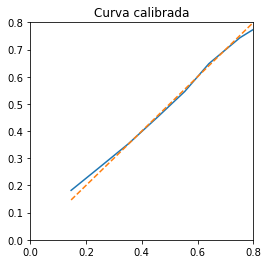

In [73]:
cc_cal = calibration_curve(y_test, y_scores_cal, n_bins=10)
plt.figure(figsize=(4,4))
plt.plot(cc_cal[0], cc_cal[1])
plt.plot(cc_cal[0], cc_cal[0], "--")
plt.xlim([0,0.8])
plt.ylim([0,0.8])
plt.title("Curva calibrada")
plt.show()

### Histograma entre clases para diferenciar el modelo descalibrado y calibrado

<img src="aws.png" width="550" alt="Discharge Chart">

Imagen extraída de https://docs.aws.amazon.com/machine-learning/latest/dg/binary-classification.html

Aquí estaremos revisando si realmente ambas clases pueden diferenciarse entre sí, esta es una forma de ver las métricas de accuracy, precision, recall, etc... de manera visual, donde las predicciones caen en cuatro grupos falsos positivos, falsos negativos, verdaderos positivos y verdaderos negativos.

Debemos seleccionar un determinado punto de corte para realizar estos análisis, usualmente es el punto de corte entre las gráficas.

In [74]:
df = pd.DataFrame({"scores":y_scores, "scores_cal": y_scores_cal, "real":y_test})
df_0 = df[df["real"]==0]
df_1 = df[df["real"]==1]

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


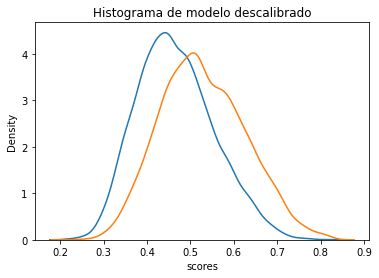

In [75]:
sns.distplot(df_0["scores"], hist=False)
sns.distplot(df_1["scores"], hist=False)
plt.title("Histograma de modelo descalibrado")
plt.show()

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


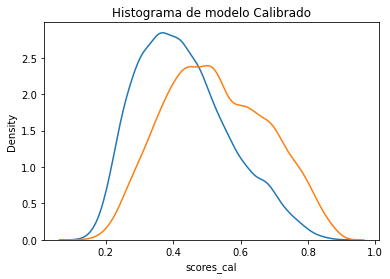

In [76]:
sns.distplot(df_0["scores_cal"], hist=False)
sns.distplot(df_1["scores_cal"], hist=False)
plt.title("Histograma de modelo Calibrado")
plt.show()

- Podemos ver que las gráficas se superponen mucho una de la otra, la suerte del punto de vista que estamos ofreciendo es que estamos enfocados en la probabilidad, el AUC es independiente del punto de corte del cuál habíamos discutido, es independiente porque una vez más hablamos de la habilidad del modelo de predecir un un puntaje más alto para muestras positivas que comparado a las negativas. 

- Igual sería bueno poder separar ambas gráficas, si el fin del experimento fuera tener una buena métrica de presición.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.681


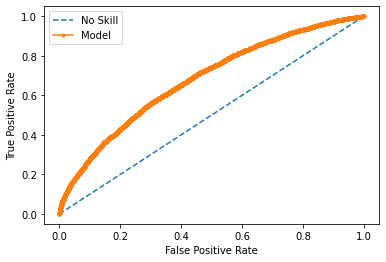

In [111]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_scores_cal)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_scores_cal)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Observamos que el modelo predice mejor que uno que predijera de manera aleatoria, el modelo es bueno, pero aún debe ser mejorado.

In [92]:

feature_imp = pd.DataFrame(sorted(zip(best_model.feature_importances_,X_test.columns), reverse=True), columns=['Value','Feature'])


In [93]:
feature_imp = feature_imp[feature_imp["Value"] > 100]

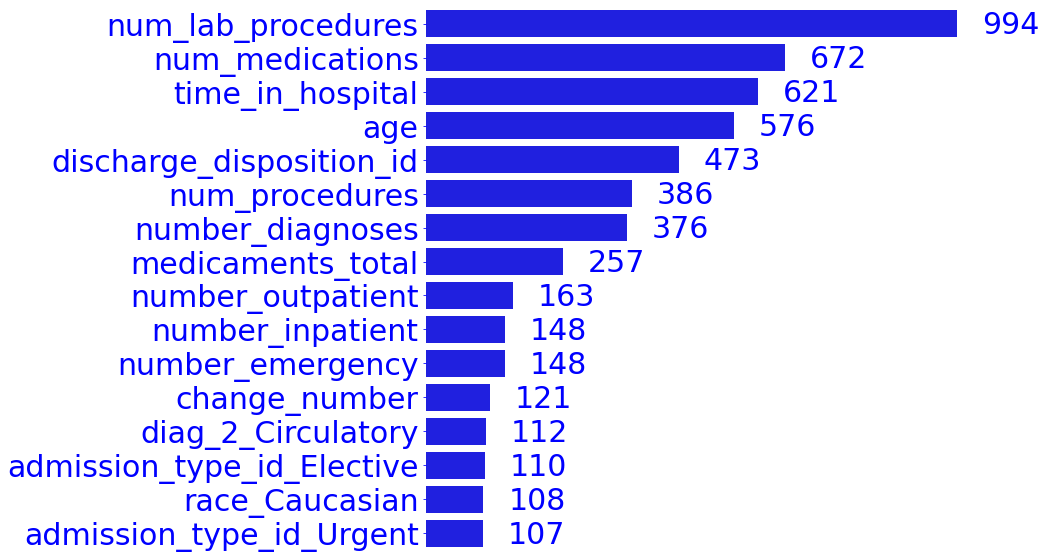

In [99]:
plt.figure(figsize=(10,10))
color = "blue"
ax = sns.barplot(y="Feature", x="Value", data=feature_imp, palette=[color], orient="h")

plt.grid(False)

ax.set_xlabel("", fontsize=30)
plt.xticks([])
plt.box(False)
ax.set_ylabel("", fontsize=30)

ax.tick_params(axis='y',which = "major", colors=color)



# jugar con estos valores
vertical_offset = 0.3
horizontal_offset = 100

ax.tick_params(axis='both', which='major', labelsize=30)
for index, row in feature_imp.iterrows():
    ax.text(row["Value"] + horizontal_offset,index+vertical_offset, # posicion
            row["Value"], # texto
            color=color, 
            ha="center", 
            size=30)
    
# plt.savefig(f'importances.png',bbox_inches='tight', transparent="True", pad_inches = 0)
plt.show()


Estas son las variables más importantes deducidas por el modelo, el número representa las veces que el árbol de decisión tomó en cuenta esa variable para tratar de clasificar correctamente la variable objetivo, si el paciente es readmitido o no, podemos destacar el número de de procedimiento de laboratorio, el número de medicaciones genéricas administradas, el tiempo en el hospital y la edad.

In [103]:
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = f'lgbm_binary_auc_{timestr}.pkl'
joblib.dump(best_model, filename)

['lgbm_binary_auc_20210208-084109.pkl']

In [106]:
timestr = time.strftime("%Y%m%d-%H%M%S")
filename = f'sigmoid_{timestr}.pkl'
joblib.dump(sigmoid, filename)

['sigmoid_20210208-084118.pkl']

## Conclusiones

- La reducción de los reingresos de pacientes diabéticos puede reducir los costes sanitarios y mejorar al mismo tiempo los resultados de salud. 

- Se tiene que tener en cuenta que esta reducción en reingresos es importante ya que puede reducir los costes sanitarios y también mejorar los resultados de salud del hospital, ayudando a implementar otras estrategias múltipls que funcionen eficazmente para los mencionados reingresos.

- Recomendaciones para el hospital es mejorar la comunicación, la seguridad de la medicación, la mejora de la formación sobre la gestión de las condiciones médicas y la planificación de los cuidados de sus pacientes, en todo eso hay toma de decisiones, pero por la naturaleza del tamaño esta experimentación de datos puede ayudar a reducir estas tasas.

- Toda la cantidad de los datos faltantes, los tipos de datos que guiaron a la limpieza, el reingreso, la prescripción de insulina,  los resultados del A1C, y los cambios observados se vieron reflejados en el número de diagnósticos, los procedimientos de laboratorio y los medicamentos, las cuales fueron variables que se estudiaron al inicio debido a que se realizó una investigación previa al iniciar la codificación, entendiendo bien el contexto en el cual se está trabajando.

¿La identificación de los pacientes readmitidos en un plazo de 30 días es menor que la de los pacientes de alto riesgo readmitidos en cualquier momento en el futuro? - Trabajo Futuro, hay que conocer mejor los intereses del hospital sobre esta herramienta construida.